In [237]:
import numpy as np
import random 
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from itertools import combinations  
from math import comb 
from scipy.stats import multivariate_normal

In [318]:
#target distribution is Normal(3,9)
#define our transition matrix Q as Normal(x_t,sigma^2)
#
def MCMC(iteration,x_initial=0):  # when t=0
    x=x_initial
    sigma=1
    X=[]
    
    for t in range(iteration):

        xprime=random.gauss(x,sigma) # Q N(x_t,1)
        u = random.uniform(0, 1)  


        p_xprime=norm.pdf(xprime, loc=3, scale=3)
        Qx_xprime=norm.pdf(x,loc=xprime,scale=1)
        p_x=norm.pdf(x, loc=3, scale=3)
        Qxprime_x=norm.pdf(xprime,loc=x,scale=1)
        #here Qxprime_x and Qx_xprime are the same


        alpha=min(1,(p_xprime*Qx_xprime)/(p_x*Qxprime_x))
        #alpha=min(1,p_xprime/p_x)
        if u<alpha:# then accept x_t+1=xprime
            x=xprime
        X.append(x)
    return X

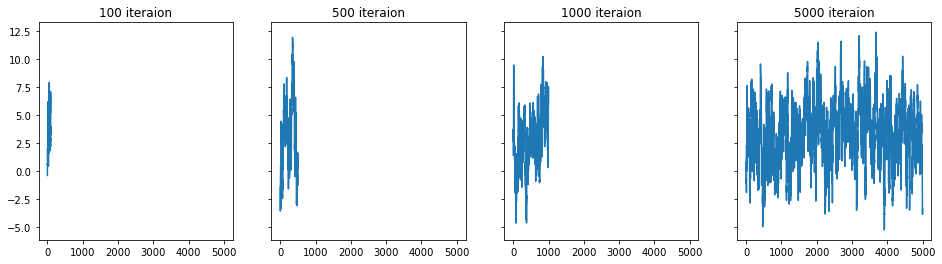

In [199]:
fig, axs = plt.subplots(1,4, figsize=(16, 4),sharex=True,sharey=True)

axs = axs.ravel()
num=[100,500,1000,5000]
t=0
for i in range(4):
    axs[i].plot(range(num[t]),MCMC(num[t]))
    axs[i].set_title("%d iteraion" % num[t])
    t+=1

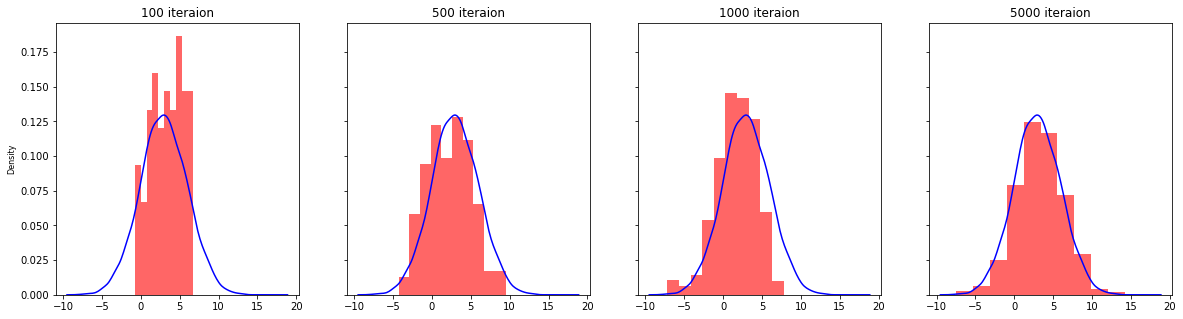

In [200]:
fig, axs = plt.subplots(1,4, figsize=(20, 5),sharex=True,sharey=True)

axs = axs.ravel()
num=[100,500,1000,5000]
t=0
r = np.random.normal(3, 3, 10000)#mu sigma number
#sns.kdeplot(r)
for i in range(4):
    axs[i].hist(MCMC(num[t]),color='r',alpha=0.6,density=True)
    sns.kdeplot(r,ax=axs[i],color='b')
    axs[i].set_title("%d iteraion" % num[t])
    axs[i].yaxis.get_label().set_fontsize(8)
    t+=1

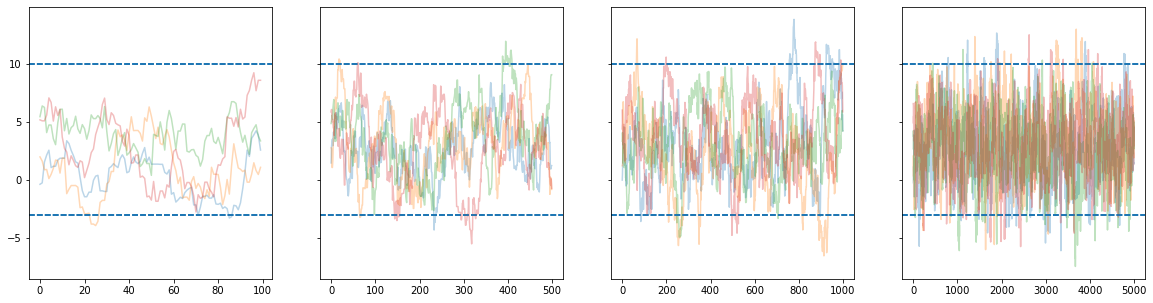

In [327]:
fig, axs = plt.subplots(1,4, figsize=(20, 5),sharey=True)
axs = axs.ravel()
t=0
num=[100,500,1000,5000]
for y in range(4):
    for x in range(0,8,2):
        axs[y].plot(range(num[t]),MCMC(num[t],x_initial=x),alpha=0.3)
        axs[y].axhline(10,ls='--')
        axs[y].axhline(-3,ls='--')   
    t+=1
#We expect that all chains explore the same region of parameter values
#Which indicates the chain is converged

#well mixed 

#R hat 
#GR convergence

#use trace plot to determine the burn-in period (number of iterations to achieve convergence)
#in this example, it seems that we have a good convergence after 1000 iterations

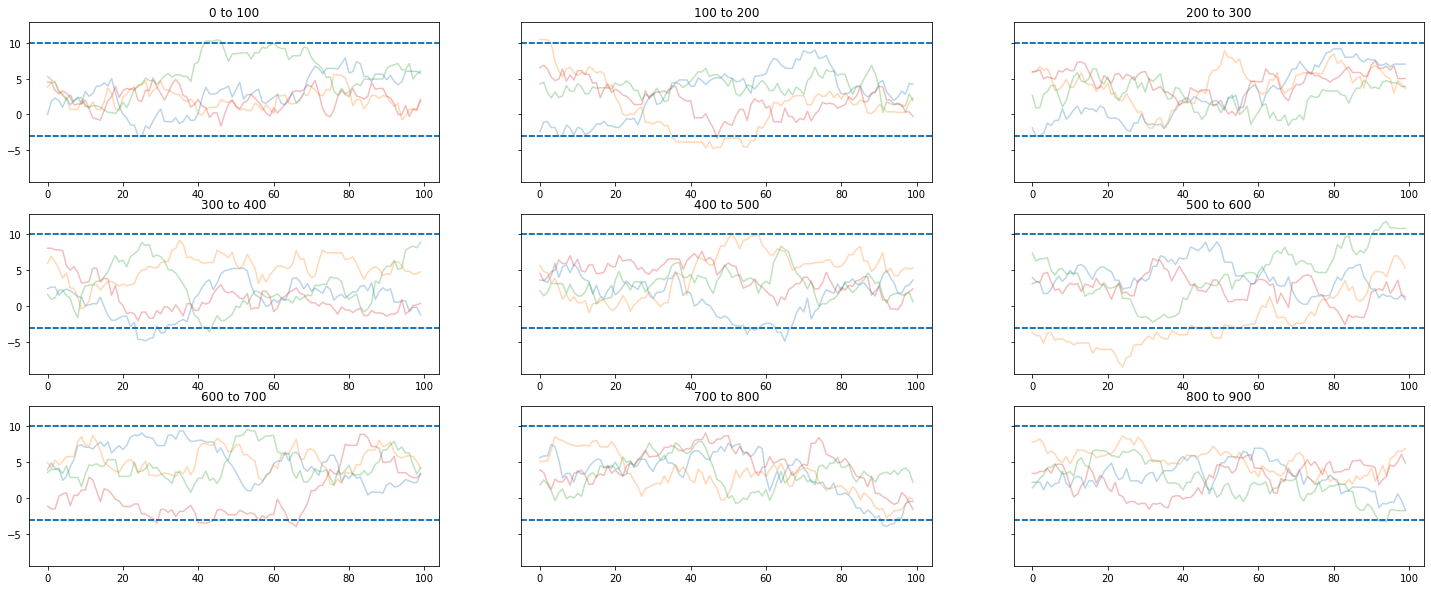

In [328]:
fig, axs = plt.subplots(3,3, figsize=(25, 10),sharey=True)
axs = axs.ravel()

for y in range(0,9):
    for x in range(0,8,2):
        result=MCMC(1000,x_initial=x)
        axs[y].plot(range(100),result[y*100:y*100+100],alpha=0.3)
        axs[y].set_title("%d to %d" %(y*100,y*100+100))
        axs[y].axhline(10,ls='--')
        axs[y].axhline(-3,ls='--')

In [313]:
#p(x|theta) follows a binomial distribution Binomial(10,theta), say we observe 2 successes

#prior distribution for theta is  Beta(alpha,beta), expectation of theta is 0.5
#posterior distribution for theta is Beta(alpha+x,beta+n-x) 
#Beta distribution is Conjugate Priors for Binomial distribution
#
def MCMC_estimate(iteration,x_initial=0.1,num_success=2,num_exp=10):
    
    x=x_initial;X=[];alpha=1;beta=1
    num=iteration
    for t in range(num):

        xprime=random.uniform(0,1)
        p_x = comb(num_exp,num_success)*x**num_success*(1-x)**(num_exp-num_success)
        p_xprime=comb(num_exp,num_success)*xprime**num_success*(1-xprime)**(num_exp-num_success)

        alpha=min(1,(p_xprime/p_x))
        u = random.uniform(0, 1) 
        if u<alpha:# then accept x_t+1=xprime
            x=xprime
        X.append(x)
    return X
    #metroplis independence


estiamted theta mean: 0.25


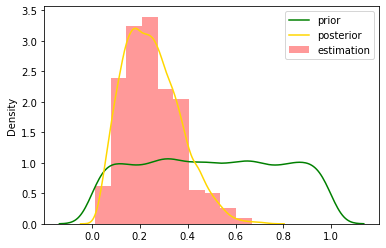

In [314]:
X=MCMC_estimate(1000)
plt.hist(X,color='r',label='estimation',alpha=0.4,density=True)
print('estiamted theta mean:',round(np.mean(X),2))

r_prior = np.random.beta(1,1,10000)
sns.kdeplot(r_prior,color='green',label='prior')
r = np.random.beta(3,9,10000)#alpha:1+2 beta:10-2+1
sns.kdeplot(r,color="gold",label='posterior')#posterior distribution
plt.legend()

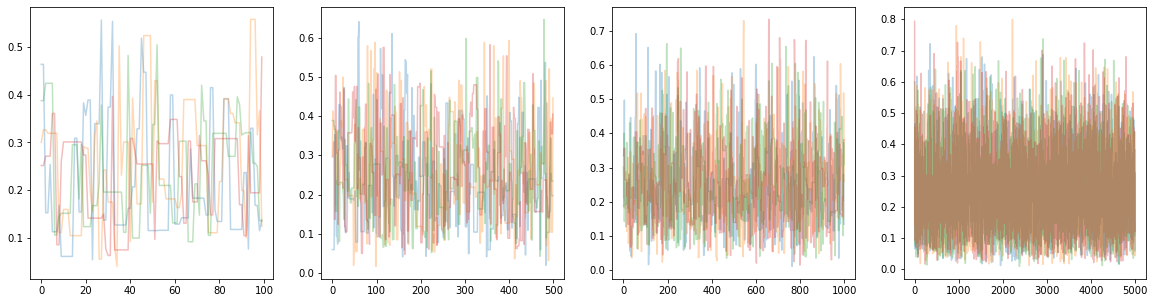

In [315]:
fig, axs = plt.subplots(1,4, figsize=(20, 5))
t=0

num=[100,500,1000,5000]
for y in range(4):
    for x in np.arange(0,1,0.3):
        axs[y].plot(range(num[t]),MCMC_estimate(num[t],x_initial=x),alpha=0.3)
    t+=1


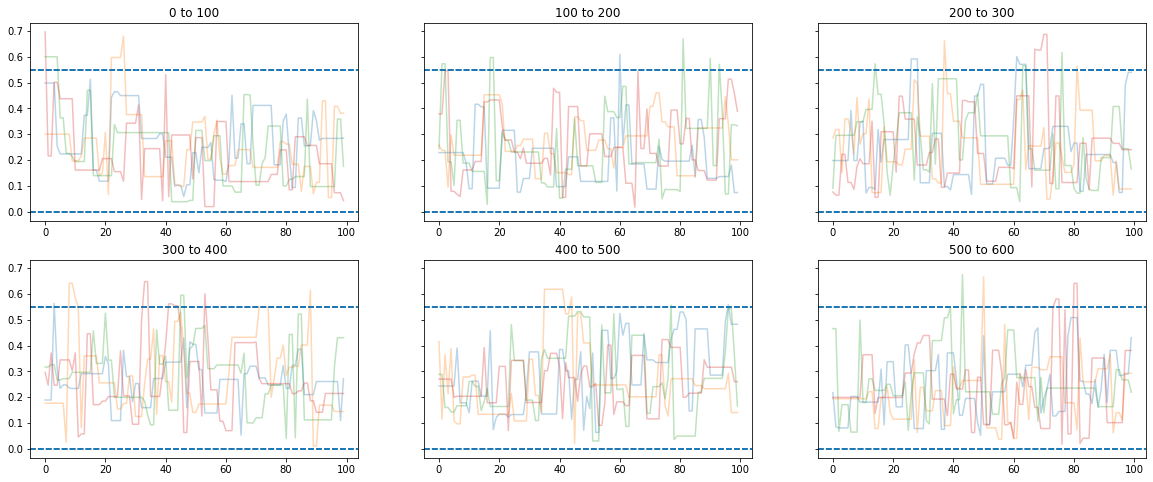

In [323]:
fig, axs = plt.subplots(2,3, figsize=(20, 8),sharey=True)
axs = axs.ravel()

for y in range(0,6):
    for x in np.arange(0,1,0.3):
        result=MCMC_estimate(1000,x_initial=x)
        axs[y].plot(range(100),result[y*100:y*100+100],alpha=0.3)
        axs[y].set_title("%d to %d" %(y*100,y*100+100))
        axs[y].axhline(0,ls='--')
        axs[y].axhline(0.55,ls='--')